In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun. April 27 13:48:02 2025

@author: Hao Si
"""
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import scipy

def OU_noise(theta, sigma, duration, dt=None):
    dt = bm.get_dt() if dt is None else dt
    n_steps = int(duration/dt)

    t = np.linspace(0, duration, n_steps)  # Time points
    xi = np.zeros(n_steps)  # OU process values
    xi[0] = 0  # Initial value (can be set to any value, here 0 for simplicity)

    # Generate OU noise using the Euler-Maruyama method
    for i in range(1, n_steps):
        dW = np.random.normal(0, np.sqrt(dt))  # Increment of Wiener process
        xi[i] = xi[i-1] - theta * xi[i-1] * dt + sigma * np.sqrt(2 * theta) * dW
    return xi

def plot_nullcline_fixpoints(pp,ax,legend_cfg,xy_label,hline_level=0,ms=2,linecolor='green',plot=True,returnx=False):
    y_val = pp.F_fx(pp.resolutions[pp.x_var])
    y_val = np.asarray(y_val)+hline_level
    x_style = dict(color=linecolor, alpha=1., linewidth=1)
    label = f"d{pp.x_var}dt"
    if plot:
        ax.plot(np.asarray(pp.resolutions[pp.x_var]), y_val, **x_style, label=label)
        ax.axhline(0+hline_level,color='k',linewidth=1)

    fps, _, pars = pp._get_fixed_points(pp.resolutions[pp.x_var])

    # import scipy
    # saddle_peak = scipy.signal.find_peaks(-bm.cumsum(y_val))[0][0]
    stable_peak = scipy.signal.find_peaks(bm.cumsum(y_val))[0]

    from brainpy._src.analysis import stability, plotstyle, constants as C, utils

    container = {a: [] for a in stability.get_1d_stability_types()}
    for i in range(len(fps)):
        x = fps[i]
        dfdx = pp.F_dfxdx(x)
        fp_type = stability.stability_analysis(dfdx)
        utils.output(f"Fixed point #{i + 1} at {pp.x_var}={x} is a {fp_type}.")
        container[fp_type].append(x)
    # ax.plot(container['unstable point'][0]+0.045,-bm.cumsum(y_val)[saddle_peak]+0.24,'ro',ms=10)
    if plot:
        if len(container['unstable point'])>0:
            ax.plot(container['unstable point'][0],0+hline_level,'ko',ms=ms,markerfacecolor='white',label='Unstable point')
        if len(container['stable point'])>0:
            for ix in range(len(container['stable point'])):
                ax.plot(container['stable point'][ix],0+hline_level,'ko',ms=ms,label='Stable point')
        if len(container['stable point'])>1:
            ax.annotate('', xy=(container['stable point'][0]+0.18, 0+hline_level), xytext=(container['stable point'][0]+0.1, 0+hline_level), arrowprops=dict(facecolor='black',arrowstyle='<|-',linewidth=.5))
            ax.annotate('', xy=(container['stable point'][0]-0.1, 0+hline_level), xytext=(container['stable point'][0]-0.05, 0+hline_level), arrowprops=dict(facecolor='black',arrowstyle='<|-',linewidth=.5))
            ax.annotate('', xy=(container['stable point'][1]-0.2, 0+hline_level), xytext=(container['stable point'][1]-0.1, 0+hline_level), arrowprops=dict(facecolor='black',arrowstyle='<|-',linewidth=.5))
            ax.annotate('', xy=(container['stable point'][1]+0.09, 0+hline_level), xytext=(container['stable point'][1]+0.02, 0+hline_level), arrowprops=dict(facecolor='black',arrowstyle='<|-',linewidth=.5))
        elif container['stable point'][0]<0.5:
            ax.annotate('', xy=(container['stable point'][0]+0.18, 0+hline_level), xytext=(container['stable point'][0]+0.1, 0+hline_level), arrowprops=dict(facecolor='black',arrowstyle='<|-',linewidth=.5))
            ax.annotate('', xy=(container['stable point'][0]-0.05, 0+hline_level), xytext=(container['stable point'][0]-0.025, 0+hline_level), arrowprops=dict(facecolor='black',arrowstyle='<|-',linewidth=.5))
        else:
            ax.annotate('', xy=(container['stable point'][0]-0.2, 0+hline_level), xytext=(container['stable point'][0]-0.1, 0+hline_level), arrowprops=dict(facecolor='black',arrowstyle='<|-',linewidth=.5))
            ax.annotate('', xy=(container['stable point'][0]+0.09, 0+hline_level), xytext=(container['stable point'][0]+0.02, 0+hline_level), arrowprops=dict(facecolor='black',arrowstyle='<|-',linewidth=.5))
    
        #xy - start, xytext - end
        if xy_label[0]:
            ax.set_xlabel('$r$')
        if xy_label[1]:
            ax.set_ylabel('$dr/dt$')
        ax.set_yticks([])
        # ax.set_xticks([])

        if legend_cfg['on']==True:
            plt.legend(loc=legend_cfg['loc'], prop={'size': legend_cfg['size']},frameon=legend_cfg['frame'])

    if returnx:
        return container

bm.enable_x64()  # It's better to enable x64 when performing analysis
bm.set_platform('cpu')

/Users/sihao/miniforge3/envs/brainpy/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# This is code for rate model of sleep transition dynamics.

Progressive cortical dynamics and underlying mechanisms in sleep stage transitions. Manli Luo#, Hao Si#, ... & Yina Wei. 2025

### Install Brainpy (https://brainpy.readthedocs.io/en/latest/) for the simulation.

## The key sub-graphs in Fig 8 can be generated as below.

### Fig 8b: get fixed points

### Fig 8c: the rate temporal dynamics with modulating w 

### Fig 8e: plot nullcline

### Fig 8f: get the map of fixed points

### rate model, get fixed points (fig8b)

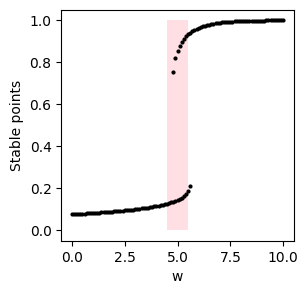

In [5]:
r0 = 0.5
x0 = 5
w = 6.5
Iext = 2.5
def R_(x):
    return 1/(1+bm.exp(-(x - x0)))
@bp.odeint
def int_r(r, t, w):
    return (-r + R_(w*r + Iext))/25

stable_points = []
stable_points_2 = [[],[]]
Iex_poinst = []
Iex_arr1 = np.arange(0.,10.1,0.1)
for Iex in Iex_arr1:
    pp = bp.analysis.PhasePlane1D(
        model=int_r,
        target_vars={'r': [0, 1.01]},
        pars_update={'w': Iex},
        resolutions={'r': 0.001}
        )
    fps, _, pars = pp._get_fixed_points(pp.resolutions[pp.x_var])

    from brainpy._src.analysis import stability, plotstyle, constants as C, utils

    container = {a: [] for a in stability.get_1d_stability_types()}
    for i in range(len(fps)):
        x = fps[i]
        dfdx = pp.F_dfxdx(x)
        fp_type = stability.stability_analysis(dfdx)
        container[fp_type].append(x)
    if len(container['stable point'])>1:
        stable_points_2[0].append(Iex)
        stable_points_2[1].append(container['stable point'][1])
    stable_points.append(container['stable point'][0])
    # Iex_poinst.append()

fig = plt.figure(figsize=(3,3))
gs = GridSpec(1,1,figure=fig)

ax = fig.add_subplot(gs[0])
ax.plot(Iex_arr1,stable_points,'ko',ms=2)
ax.plot(stable_points_2[0],stable_points_2[1],'ko',ms=2)
ax.set_xlabel('w')
ax.set_ylabel('Stable points')
ax.fill_between([4.5,5.5],0.,1.,facecolor='pink',alpha=0.5)

### rate model, temporal dynamics, modulating w (fig8c)

Predict 100000 steps: : 100%|██████████| 100000/100000 [00:01<00:00, 79135.27it/s]


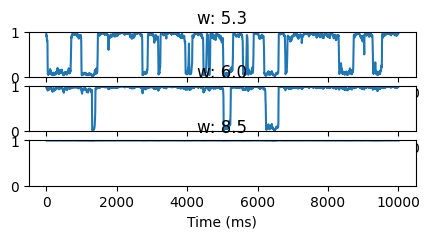

In [6]:
class rate(bp.DynamicalSystem):
  def __init__(self, num,method='exp_auto'):
    super(rate, self).__init__()

    self.x0 = 5
    self.r0 = 0.5
    self.tau_r = 1
    self.Iext = 2.

    # self.r = bm.Variable(bm.random.uniform(0., 1.,num))
    self.r = bm.Variable(bm.ones(num))
    self.w = bm.Variable(bm.zeros(num))

    self.int_r = bp.odeint(self.dr, method=method)
  def R_(self,x):
    return 1/(1+bm.exp(-(x - self.x0)))
  def dr(self, r, t, Inj,w=0.):
    return (-r + self.R_(w*r + self.Iext + Inj ))/self.tau_r
    
  def update(self,Inj):
    t = bp.share['t']
    dt = bp.share['dt']
    self.r.value = self.int_r(self.r, t, Inj, self.w, dt)
    self.w[:] = 0
# initialize a network
num = 3
model = rate(num)
# simulation with an input
duration = 10000
w = np.array([5.3,6,8.5])#np.linspace(5,10,num)
runner = bp.DSRunner(model, monitors=['r'], inputs=['w', w])
noise = OU_noise(theta=.01,sigma=.5,duration=duration)#ou noise
noise_ = noise+0.5
runner.run(inputs=noise_)

# visualization
fig = plt.figure(figsize=(5,2))
gs = GridSpec(w.shape[0],1,figure=fig)

for ix in range(w.shape[0]):
  ax = fig.add_subplot(gs[ix])
  bp.visualize.line_plot(runner.mon.ts, runner.mon.r[:,ix],show=False)
  ax.set_ylim([0,1.])
  ax.set_title('w: {}'.format(w[ix]))

### rate model, plot nullcline (fig8e)

Fixed point #1 at r=0.07866183221291412 is a stable point.
Fixed point #1 at r=0.14479410825606473 is a stable point.
Fixed point #2 at r=0.5 is a unstable point.
Fixed point #3 at r=0.5 is a unstable point.
Fixed point #4 at r=0.855205891743935 is a stable point.
Fixed point #1 at r=0.954069262895885 is a stable point.


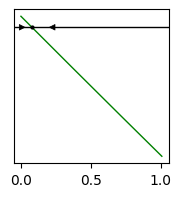

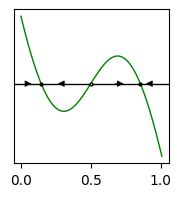

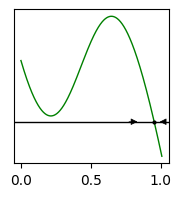

In [7]:
r0 = 0.5
x0 = 5
w = 6.5
Iext = 2.5
def R_(x):
    return 1/(1+bm.exp(-(x - x0)))
@bp.odeint
def int_r(r, t, w):
    return (-r + R_(w*r + Iext))

pp_list = []
for ix,w in enumerate([.5,5.,5.8]):
    fig = plt.figure(figsize=(2,2))
    gs = GridSpec(1,1,figure=fig)
    pp = bp.analysis.PhasePlane1D(
        model=int_r,
        target_vars={'r': [0., 1.01]},
        pars_update={'w': w},
        resolutions={'r': 0.001}
        )
    pp_list.append(pp)


    ax = fig.add_subplot(gs[0])
    legend_cfg = {'on':False,'loc':1, 'size':6, 'frame':False}
    plot_nullcline_fixpoints(pp,ax,legend_cfg,xy_label=[False,False])


### rate model, get the map of fixed points (fig8f)

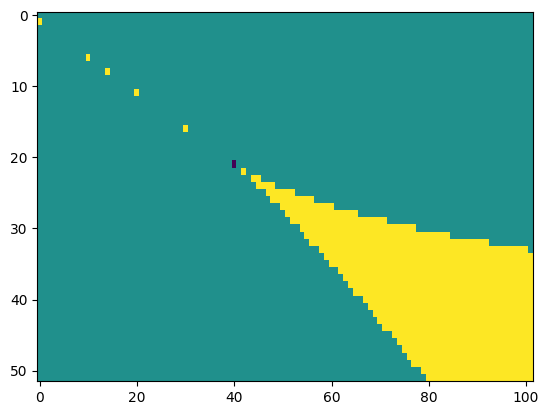

In [ ]:
Iex_arr = np.arange(0.,5.2,0.1)
w_arr = np.arange(0.,10.2,0.1)
stable_I_w = np.zeros((Iex_arr.shape[0],w_arr.shape[0]))
for j,w in enumerate(w_arr):
    r0 = 0.5
    x0 = 5
    def R_(x):
        return 1/(1+bm.exp(-(x - x0)))
    @bp.odeint
    def int_r(r, t, Iext):
        return -r + R_(w*r + Iext)
    for i,Iex in enumerate(Iex_arr):
        pp = bp.analysis.PhasePlane1D(
            model=int_r,
            target_vars={'r': [0, 1.01]},
            pars_update={'Iext': Iex},
            resolutions={'r': 0.001}
            )
        fps, _, pars = pp._get_fixed_points(pp.resolutions[pp.x_var])

        from brainpy._src.analysis import stability, plotstyle, constants as C, utils

        container = {a: [] for a in stability.get_1d_stability_types()}
        for ix in range(len(fps)):
            x = fps[ix]
            dfdx = pp.F_dfxdx(x)
            fp_type = stability.stability_analysis(dfdx)
            # utils.output(f"Fixed point #{i + 1} at {pp.x_var}={x} is a {fp_type}.")
            container[fp_type].append(x)
        stable_I_w[Iex_arr.shape[0]-i-1,j] = len(container['stable point'])

plt.imshow(stable_I_w,aspect='auto')